In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
import os
import neurokit2 as nk2
import h5py
import biosppy
import transformations as tfm
from scipy import signal

import warnings
warnings.filterwarnings("error")

In [2]:
#  Loading paths
path_norm = r'./Converted data/Normal sinus rhythm/Normal_Sinus_rhythm.npy'
path_afib = r'./Converted data/Atrial flutter/Atrial_Flutter.npy'
path_afl = r'./Converted data/Atrial fibrillation/Atrial_Fibrillation.npy'
path_code_afib = r'./Finalized data/Supraventricular ectopic beats/Code15%/AF_traced2.hdf5'

# Saving paths
path_save_norm = r'Finalized data/Normal sinus rhythm/'
path_save_afib = r'Finalized data/Atrial fibrillation/'
path_save_afl = r'Finalized data/Atrial flutter/'

In [3]:
norm_npy = np.load(path_norm, allow_pickle=True)
afib_npy = np.load(path_afib, allow_pickle=True)
afl_npy = np.load(path_afl, allow_pickle=True)
with h5py.File(path_code_afib, 'r') as f:
    afib_code = f['tracings'][:]
    print(afib_code.shape)
print(norm_npy.shape, afib_npy.shape, afl_npy.shape)

(7033, 4096, 12)
(13475,) (4886,) (2284,)


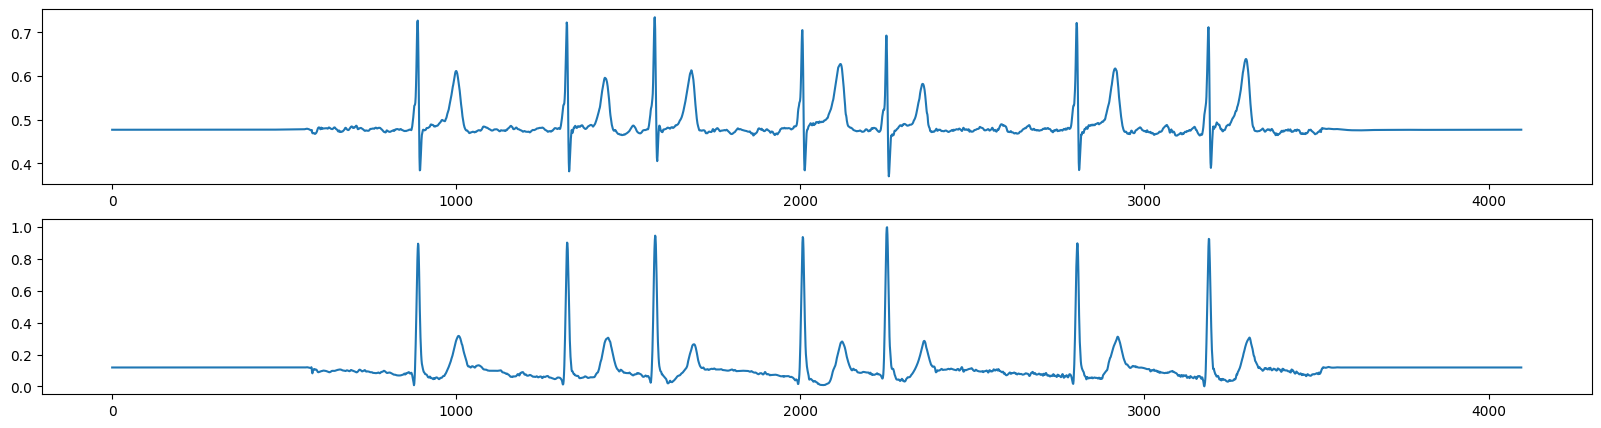

In [4]:
temp = tfm.normalize(tfm.calc_baseline(tfm.powerline(afib_code[0, :, 0])))
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
plt.plot(tfm.rms_transform2(afib_code[0]))
plt.subplot(2, 1, 2)
plt.plot(temp)
plt.show()
del temp

In [5]:
errors_Afib = [114, 334, 383, 850, 1297, 1389, 1767, 1861, 1869,
                1911, 1945, 2082, 2240, 2804, 2822, 2857, 3043, 3078,
                3427, 3557, 3583, 3584, 3627, 3778, 3901, 3974, 4341,
                4492, 4504, 4511, 4544, 4959, 5009, 5236, 5322, 5734,
                5753, 5936, 6162, 6286, 6287, 6319, 6550]


In [6]:
code_npy = []
count = 0
for i in afib_code:
    if count in errors_Afib:
            print(f'Error in {count}')
            count += 1

            continue
    try:
        temp = tfm.all_transform(i)
    except Exception as e:
        # temp = tfm.normalize(tfm.calc_baseline(tfm.powerline(tfm.rms_transform(temp))))
        print(f'Error {e} in {count}')
        errors_Afib.append(count)
        print(errors_Afib)
        count += 1
        continue
    code_npy.append(temp)
    # print(f'Code {count} saved')
    count += 1
code_npy = np.array(code_npy)
print(code_npy.shape, len(errors_Afib))

Error in 114
Error in 334
Error in 383
Error in 850
Error in 1297
Error in 1389
Error in 1767
Error in 1861
Error in 1869
Error in 1911
Error in 1945
Error in 2082
Error in 2240
Error in 2804
Error in 2822
Error in 2857
Error in 3043
Error in 3078
Error in 3427
Error in 3557
Error in 3583
Error in 3584
Error in 3627
Error in 3778
Error in 3901
Error in 3974
Error in 4341
Error in 4492
Error in 4504
Error in 4511
Error in 4544
Error in 4959
Error in 5009
Error in 5236
Error in 5322
Error in 5734
Error in 5753
Error in 5936
Error in 6162
Error in 6286
Error in 6287
Error in 6319
Error in 6550
Error overflow encountered in reduce in 6805
[114, 334, 383, 850, 1297, 1389, 1767, 1861, 1869, 1911, 1945, 2082, 2240, 2804, 2822, 2857, 3043, 3078, 3427, 3557, 3583, 3584, 3627, 3778, 3901, 3974, 4341, 4492, 4504, 4511, 4544, 4959, 5009, 5236, 5322, 5734, 5753, 5936, 6162, 6286, 6287, 6319, 6550, 6805]
Error overflow encountered in reduce in 6876
[114, 334, 383, 850, 1297, 1389, 1767, 1861, 1869, 

In [7]:
print(code_npy.shape, len(errors_Afib))

(6986, 4096) 47


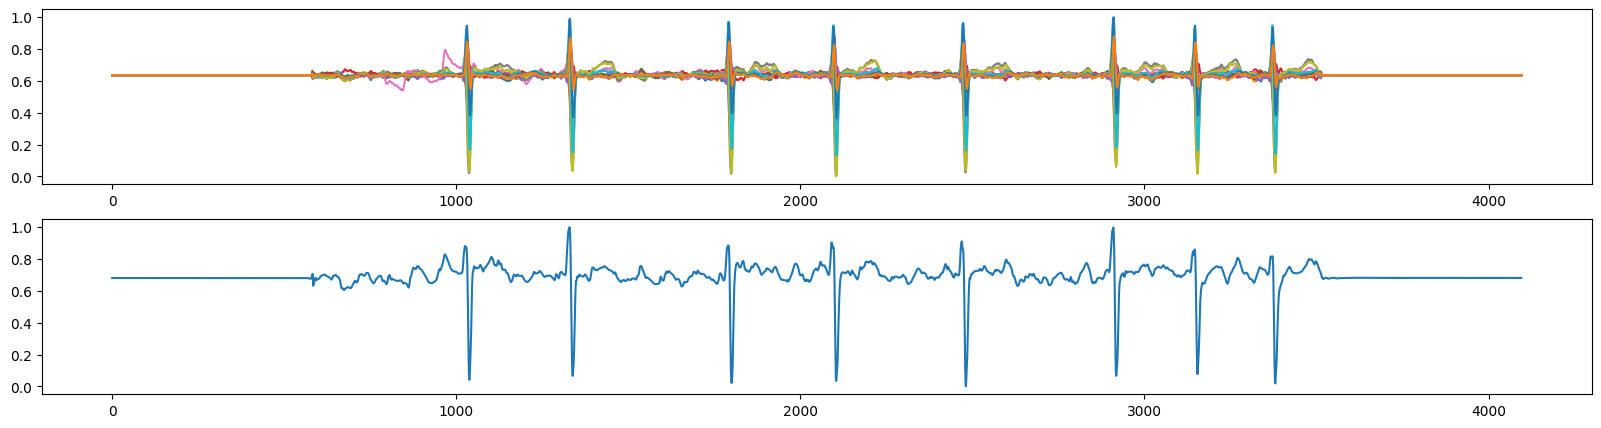

In [8]:
temp = tfm.normalize(tfm.calc_baseline(tfm.powerline(afib_code[0, :, 0])))
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
plt.plot(afib_code[8])
plt.subplot(2, 1, 2)
plt.plot(code_npy[8])
plt.show()
del temp

In [9]:
# afib_tot = np.concatenate((afib_npy, code_npy), axis=0)
print(afib_npy[0].shape, code_npy.shape)
# code_afib = np.array(code_npy, dtype='object')
# break

(5000,) (6986, 4096)


SyntaxError: 'break' outside loop (3592735325.py, line 4)

In [10]:
cnt1 = 0
cnt2 = 0
cnt3 = 0
for i in afl_npy:
    if i.shape[0] != 5000:
        cnt1 += 1
for i in afib_npy:
    if i.shape[0] != 5000:
        cnt2 += 1
for i in norm_npy:
    if i.shape[0] != 5000:
        cnt3 += 1
print(int(afl_npy.shape[0]), cnt1)
print(f'Normal: {norm_npy.shape[0]} - {cnt3} = {int(norm_npy.shape[0]) - cnt3} \nAfib: {afib_npy.shape[0]} - {cnt2} = {int(afib_npy.shape[0]) - cnt2} \nAFL: {afl_npy.shape[0]} - {cnt1} = {int(afl_npy.shape[0]) - cnt1} ')

2284 348
Normal: 13475 - 364 = 13111 
Afib: 4886 - 4 = 4882 
AFL: 2284 - 348 = 1936 


In [12]:
norm_new = []
afib_new = []
afl_new = []
afib_code_new = []
arrhythmia = []
for i in code_npy:
    temp = signal.resample(i, 5000)
    afib_code_new.append(temp)
    del temp

for i in norm_npy:
    if i.shape[0] == 5000:
        norm_new.append(i)
for i in afib_npy:
    if i.shape[0] == 5000:
        afib_new.append(i)
for i in afl_npy:
    if i.shape[0] == 5000:
        afl_new.append(i)
print(len(norm_new), len(afib_new), len(afl_new))
print(len(afib_code_new))


# afl_new = afl_new + afl_new + afl_new + afl_new + afl_new + afl_new
# afib_new = afib_new + afib_code_new
print(len(norm_new), len(afib_new), len(afl_new))
print(len(afib_code_new))
    

13111 4882 1936
6986
13111 4882 1936
6986


In [13]:
arrhythmia = afib_new + afib_code_new + afl_new
print(len(norm_new),len(arrhythmia))

13111 13804


In [ ]:

cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
norm_new = np.array(norm_new)
afib_new = np.array(afib_new)
afl_new = np.array(afl_new)
afib_code_new = np.array(afib_code_new)
for i in afl_new:
    if i.shape[0] != 5000:
        cnt1 += 1
for i in afib_new:
    if i.shape[0] != 5000:
        cnt2 += 1
for i in norm_new:
    if i.shape[0] != 5000:
        cnt3 += 1
for i in afib_code_new:
    if i.shape[0] != 5000:
        cnt4 += 1
print(f'Normal: {norm_new.shape[0]} - {cnt3} = {int(norm_new.shape[0]) - cnt3}')
print(f'Afib  :  {afib_new.shape[0]} - {cnt2} = {int(afib_new.shape[0]) - cnt2}')
print(f'AFL   : {afl_new.shape[0]} - {cnt1} = {int(afl_new.shape[0]) - cnt1} ')
print(f'Afib_code: {afib_code_new.shape[0]} - {cnt4} = {int(afib_code_new.shape[0]) - cnt4} ')
del cnt1, cnt2, cnt3, cnt4

In [ ]:
afib_concatenated = np.concatenate((afib_new, afib_code_new), axis=0)
print(afib_concatenated.shape, norm_new.shape, afl_new.shape)
# Shuffle all the data
np.random.shuffle(norm_new)
np.random.shuffle(afib_concatenated)
np.random.shuffle(afl_new)


In [14]:
np.save(r'./Class01/Not Arrhythmia/' + 'NORMAL', norm_new)
np.save(r'./Class01/Arrhythmia/' + 'ARRHYTHMIA', arrhythmia)

In [ ]:
np.save(path_save_norm + 'NORM', norm_new)
np.save(path_save_afib + 'AFIB', afib_concatenated)
np.save(path_save_afl + 'AFL', afl_new)


In [ ]:
#resample code_afib from 400 to 500

code_npy[0].shape
resample_s = signal.resample(code_npy[0], 5000)
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
plt.plot(code_npy[0])
plt.subplot(2, 1, 2)
plt.plot(resample_s)
plt.show()


In [ ]:
afib_npy = np.array(afib_npy, dtype='object')
print(type(afib_npy), type(code_npy))
list_afib = list(afib_npy)
list_code = list(code_npy)
print(type(list_afib), type(list_code), len(list_afib), len(list_code))
afib_tot = list_afib + list_code
afl_npy = list(afl_npy)

#increase the number of atrial flutter examples by multiplying by 6
afl_tot = []
for i in afl_npy:
    for j in range(6):
        afl_tot.append(i)

print(len(afib_tot), len(afl_tot))
afib_tot = np.array(afib_tot, dtype='object')
print(afib_tot.shape)

In [ ]:
print()